In [1]:
! pip install pandas-datareader

In [2]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2009,9,26)
end = datetime(2019,9,26)
stocks = ['AAPL','ADBE','AMZN','CRM','CS','FB','GOOG','IBM','INTC','MSFT','V']
#Filters out Equities from list of stocks
indexes = ['IYW','QQQ']

df = web.DataReader(stocks,'yahoo',start,end)
I = web.DataReader(indexes,'yahoo',start,end)
I.reset_index(inplace= True)
df.reset_index(inplace= True)
iv = I['Volume']
ix = I['Adj Close']
adjClose = df['Adj Close']
volume = df['Volume']

In [3]:
#adjClose.fillna()
adjClose['FB'] = adjClose['FB'].fillna(38)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:

low = df['Low']
high = df['High']
#Daily return function
def daily_return(prices):
    return prices.pct_change()*100


#Annualized volatility function
def annualized_volatility (dr):
    Dr = daily_return(dr)
    annualized_volatility = Dr.iloc[-60:].std()*m.sqrt(252)
    return (annualized_volatility)

#Beta to QQQ function
def beta_against_QQQ(value):
        DQ = daily_return(ix['QQQ'].iloc[-253:])
        DS = daily_return(value.iloc[-253:])
        DS = DS.dropna()
        DQ = DQ.dropna()
        Beta = np.cov(DS,DQ).item(2)/np.var(DQ)
        return Beta

#Drawdown --> max&avg
def draw_down (value,ticker):
    dDown = []
    #Max = adjClose[ticker].rolling(252).max()
    for i in range(len(adjClose)):
        Max = adjClose[ticker].rolling(252).max()
        dDown.append((Max[i]-adjClose[ticker][i])/100)
    if value == 'a':
        return np.nanmean(dDown)
    if value == 'm':
        return  np.nanmax(dDown)
    
#total return
def total_return (value,s,e):
    ret = (value.iloc[e]-value.iloc[s])/value.iloc[s]*100
    return ret


#Annualized return
def annualized_return (value):
    tr=total_return(value,0,-1)
    ar = (abs(1+tr)**(1/10)-1)*100
    return ar

tickers= []
for col in adjClose:
        tickers.append(col)
pot = []
anv = []
bet = []
avg = []
mad = []
tot = []
anr = []
i =0

for i in tickers:
    pot.append(1/11)
    anv.append(annualized_volatility(adjClose[i]))
    bet.append(beta_against_QQQ(adjClose[i]))
    avg.append(draw_down('a',i))
    mad.append(draw_down('m',i))
    tot.append(total_return(adjClose[i],0,-1))
    anr.append(annualized_return(adjClose[i]))


data1 = {'Ticker':['AAPL','ADBE','AMZN','CRM','CS','FB','GOOG','IBM','INTC','MSFT','V'],
        'Portfolio Weight':pot,
        'Annualized Volatility':anv,
        'Beta against QQQ':bet,
        'Average Drawdown':avg,
        'Maximum Drawdown':mad,
        'Total Return':tot,
        'Annualized Total Return':anr
       }
part1 = pd.DataFrame(data1)

part1


,Ticker,Portfolio Weight,Annualized Volatility,Beta against QQQ,Average Drawdown,Maximum Drawdown,Total Return,Annualized Total Return
0,AAPL,0.090909,26.763429,1.203488,0.122704,0.877546,842.867202,96.167660
1,ADBE,0.090909,23.408414,1.295271,0.056031,0.703300,742.818117,93.707607
2,AMZN,0.090909,20.957531,1.407203,0.605586,6.955500,1771.217838,111.276751
3,CRM,0.090909,23.370963,1.242080,0.058794,0.397600,931.912242,98.145439
4,CS,0.090909,23.414695,0.660291,0.055923,0.183181,-68.061393,52.281539
5,FB,0.090909,24.767520,1.084632,0.102512,0.934400,366.052648,80.498184
6,GOOG,0.090909,29.526842,1.073207,0.478647,2.921100,393.323131,81.796378
7,IBM,0.090909,23.444318,0.708211,0.146408,0.517493,62.724233,51.506220
8,INTC,0.090909,26.089690,0.947138,0.030674,0.148198,251.193954,73.849508
9,MSFT,0.090909,21.110858,1.079389,0.023427,0.206770,578.132608,88.919941


In [5]:
############  Part 2  ###############

def Returns(value):
    r = value.pct_change()
    return(r[1:])
def correlation_againt_ETF(stock,etf):
    return(stock.corr(etf))
def covariance_againt_ETF(stock,etf):
    return(stock.cov(etf))
def tracking_errors(stock,etf):
    return m.sqrt((sum((stock-etf)**2))/(len(stock)))
def sharpe_ratio(etf):
    tr=sum(etf)
    ar = ((1+tr)**(1/10)-1)
    return (ar-.02)/(etf.std()*np.sqrt(252))
def annualized_volatility252(value):
    av = value[-252:].std()*m.sqrt(252)
    return av
def annualized_volatility_spread(stock,etf):
    return(annualized_volatility252(stock)-annualized_volatility252(etf))



In [6]:
tik = []
cor = []
cov = []
tre = []
sra = []
avo = []

pTotal = 0
for i in adjClose:
    pTotal += (adjClose[i])
qTotal =0
pReturn = Returns(pTotal)[1:]
    
ETFreturns = []
ETFreturns.append(Returns(ix['QQQ']))
ETFreturns.append(Returns(ix['IYW']))


for i in ix:
    pReturn = Returns(pTotal)
    tik.append(i)
    cor.append(correlation_againt_ETF(pReturn,Returns(ix[i])))
    cov.append(covariance_againt_ETF(pReturn,Returns(ix[i])))
    tre.append(tracking_errors(pReturn,Returns(ix[i])))
    sra.append(sharpe_ratio(Returns(pTotal)))
    avo.append(annualized_volatility_spread(pReturn,Returns(ix[i])))




data2 = {'Ticker':tik,
       'Correlation against ETF':cor,
       'Covariance of Portfolio against ETF':cov,
       'Tracking errors':tre,
       'Sharpe Ratio':sra,
       'Annualized Volatility':avo
       }


part2 = pd.DataFrame(data2)
part2

,Ticker,Correlation against ETF,Covariance of Portfolio against ETF,Tracking errors,Sharpe Ratio,Annualized Volatility
0,IYW,0.862494,0.000127,0.006517,0.495701,0.043869
1,QQQ,0.888041,0.000125,0.005927,0.495701,0.061979


In [7]:
#Part 3
allReturns = []
weight =.090909
for i in adjClose:
    allReturns.append(adjClose[i].pct_change()[1:])
for i in ix:
    allReturns.append(ix[i].pct_change()[1:])
pTotal = 0
pReturn = 0
for i in adjClose:
    pTotal += (adjClose[i].pct_change())
pReturn = pTotal
allReturns.append(pReturn)

name = []
for i in adjClose:
    name.append(i)
for i in ix:
    name.append(i)
name.append('Portfolio')

part3 = pd.DataFrame(columns=name)
j=0
for i in part3:
    part3[i]=allReturns[j]
    j+=1
correlation_matrix = part3.corr()
correlation_matrix.style.background_gradient(cmap= 'plasma',axis = None)

,AAPL,ADBE,AMZN,CRM,CS,FB,GOOG,IBM,INTC,MSFT,V,IYW,QQQ,Portfolio
AAPL,1,0.392563,0.377526,0.375242,0.312571,0.238761,0.463472,0.387662,0.427304,0.454664,0.391587,0.746235,0.719511,0.644872
ADBE,0.392563,1,0.434122,0.543089,0.377878,0.275087,0.478361,0.414017,0.433953,0.548525,0.494571,0.675567,0.678231,0.734359
AMZN,0.377526,0.434122,1,0.450273,0.264825,0.31214,0.535392,0.331309,0.344618,0.487273,0.414309,0.581453,0.641003,0.686855
CRM,0.375242,0.543089,0.450273,1,0.349526,0.286324,0.431088,0.371458,0.397798,0.46226,0.439365,0.641234,0.634033,0.715434
CS,0.312571,0.377878,0.264825,0.349526,1,0.130306,0.367221,0.405123,0.396526,0.390731,0.383559,0.538928,0.541903,0.605885
FB,0.238761,0.275087,0.31214,0.286324,0.130306,1,0.339753,0.168959,0.224919,0.269325,0.267641,0.38837,0.396008,0.495928
GOOG,0.463472,0.478361,0.535392,0.431088,0.367221,0.339753,1,0.405032,0.406703,0.534978,0.476622,0.710461,0.724452,0.731543
IBM,0.387662,0.414017,0.331309,0.371458,0.405123,0.168959,0.405032,1,0.467398,0.484964,0.416004,0.636303,0.596326,0.62887
INTC,0.427304,0.433953,0.344618,0.397798,0.396526,0.224919,0.406703,0.467398,1,0.561098,0.402919,0.702171,0.675125,0.671512
MSFT,0.454664,0.548525,0.487273,0.46226,0.390731,0.269325,0.534978,0.484964,0.561098,1,0.470828,0.765564,0.749986,0.753017


In [ ]:
#Part4
part4=df['Adj Close']
part4.set_index(pd.to_datetime(df['Date']),inplace= True)

In [ ]:
cov_matrix = part4.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

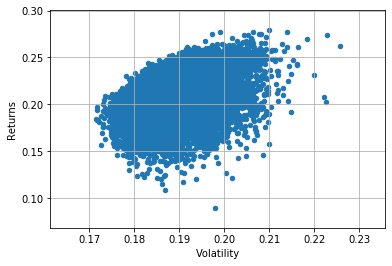

In [11]:
er = part4.resample('Y').last().pct_change().mean()
sd = part4.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
assets = pd.concat([er,sd],axis =1)
assets.columns = ['Returns','Volatility']
p_ret = []
p_vol = []
p_weights = []
num_assets = len(part4.columns)
num_portfolios = 20000
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,er)
    p_ret.append(returns)
    var = cov_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(250)
    p_vol.append(ann_sd)
data = {'Returns':p_ret,'Volatility':p_vol}
for counter, symbol in enumerate(part4.columns.tolist()):
    data[symbol+'weights']=[w[counter]for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.plot.scatter(x='Volatility',y= 'Returns',grid  = True)

In [13]:
#optimal portfolio
oP = portfolios.iloc[((portfolios['Returns']-.02)/portfolios['Volatility']).idxmax()]


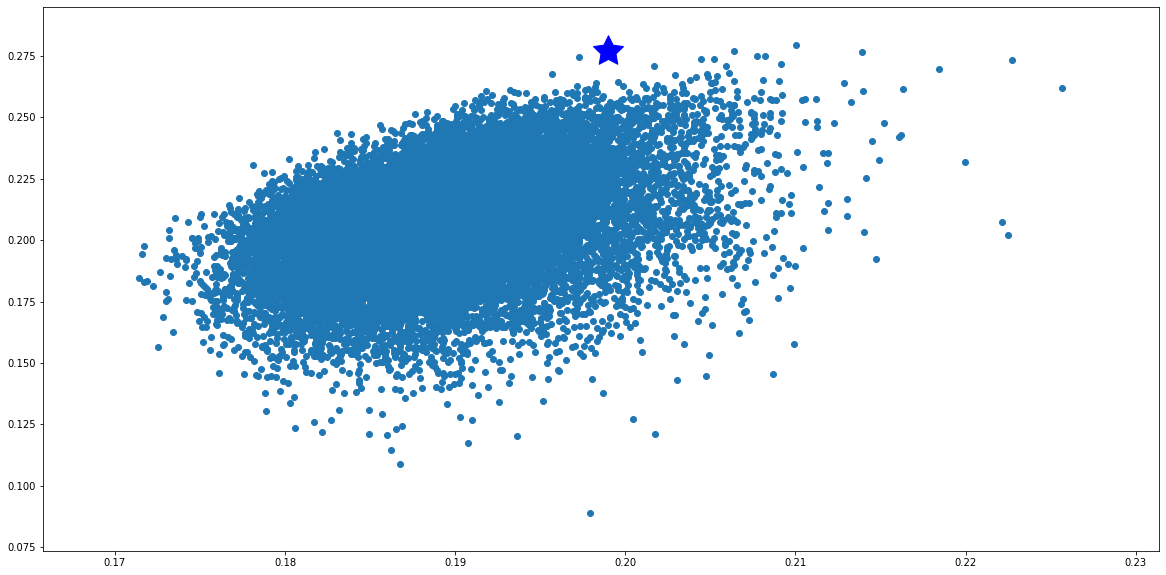

In [14]:
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'],portfolios['Returns'])
plt.scatter(oP[1],oP[0],marker=(5,1,0),color='b',s=1000)